In [1]:
import pickle
import json

from cnn import *
from diagram_builder import *
from reader import *
from metrics import *

In [2]:
def display_metric(metric_train, metric_test, metric_name):
    display(f'{metric_name}')
    display('TRAIN')
    for i in range(0, number_of_classes):
        display(f'{i}: {metric_train[i]}')
    display('TEST')
    for i in range(0, number_of_classes):
        display(f'{i}: {metric_test[i]}')

In [3]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

with open(config['nn']['file'], 'rb') as nn_file:
    cnn = pickle.load(nn_file)

with open(config['reader']['file'], 'rb') as reader_file:
    reader = pickle.load(reader_file)

train = reader.get_train()
test = reader.get_test()

train_outputs = cnn.test(train[0])
test_outputs = cnn.test(test[0])
decoded_output_train = decode_all(train_outputs)
decoded_output_test = decode_all(test_outputs)
decoded_expected_train = decode_all(train[1])
decoded_expected_test = decode_all(test[1])

train_accuracy = accuracy(decoded_output_train, decoded_expected_train)
test_accuracy = accuracy(decoded_output_test, decoded_expected_test)
display('ACCURACY')
display(f'test: {test_accuracy}, train: {train_accuracy}')
cms_train = confusion_matrix_all(
    decoded_output_train, decoded_expected_train)
cms_test = confusion_matrix_all(decoded_output_test, decoded_expected_test)
display_metric(cms_train, cms_test, 'CONFUSION MATRIX [TP, TN, FN, FP]')
recalls_train = metric_all(cms_train, recall)
recalls_test = metric_all(cms_test, recall)
display_metric(recalls_train, recalls_test, 'RECALL')
precisions_train = metric_all(cms_train, precision)
precisions_test = metric_all(cms_test, precision)
display_metric(precisions_train, precisions_test, 'PRECISION')
f1_train = metric_all(cms_train, f1)
f1_test = metric_all(cms_test, f1)
display_metric(f1_train, f1_test, 'F1')

'ACCURACY'

'test: 0.9792979297929792, train: 0.9824330405506758'

'CONFUSION MATRIX [TP, TN, FN, FP]'

'TRAIN'

'0: [5899, 53046, 24, 105]'

'1: [6657, 52288, 85, 85]'

'2: [5854, 53091, 104, 140]'

'3: [5977, 52968, 154, 122]'

'4: [5756, 53189, 86, 110]'

'5: [5285, 53660, 135, 39]'

'6: [5856, 53089, 62, 74]'

'7: [6165, 52780, 100, 120]'

'8: [5706, 53239, 145, 110]'

'9: [5790, 53155, 159, 149]'

'TEST'

'0: [974, 8818, 6, 33]'

'1: [1129, 8663, 6, 12]'

'2: [1013, 8779, 19, 29]'

'3: [985, 8807, 25, 24]'

'4: [964, 8828, 18, 20]'

'5: [865, 8927, 27, 5]'

'6: [941, 8851, 17, 15]'

'7: [1000, 8792, 27, 27]'

'8: [948, 8844, 26, 19]'

'9: [973, 8819, 36, 23]'

'RECALL'

'TRAIN'

'0: 0.9959479993246666'

'1: 0.9873924651438742'

'2: 0.9825444780127559'

'3: 0.9748817484912738'

'4: 0.9852790140362889'

'5: 0.9750922509225092'

'6: 0.9895234876647516'

'7: 0.9840383080606544'

'8: 0.9752179114681251'

'9: 0.9732728189611699'

'TEST'

'0: 0.9938775510204082'

'1: 0.9947136563876652'

'2: 0.9815891472868217'

'3: 0.9752475247524752'

'4: 0.9816700610997964'

'5: 0.9697309417040358'

'6: 0.9822546972860126'

'7: 0.9737098344693281'

'8: 0.973305954825462'

'9: 0.9643211100099108'

'PRECISION'

'TRAIN'

'0: 0.9825116588940707'

'1: 0.9873924651438742'

'2: 0.9766433099766433'

'3: 0.9799967207738973'

'4: 0.9812478690760313'

'5: 0.9926746806912096'

'6: 0.9875210792580101'

'7: 0.9809069212410502'

'8: 0.9810866574965612'

'9: 0.9749116012796767'

'TEST'

'0: 0.9672293942403177'

'1: 0.9894829097283085'

'2: 0.972168905950096'

'3: 0.9762140733399405'

'4: 0.9796747967479674'

'5: 0.9942528735632183'

'6: 0.9843096234309623'

'7: 0.9737098344693281'

'8: 0.9803516028955532'

'9: 0.9769076305220884'

'F1'

'TRAIN'

'0: 0.9891842039071015'

'1: 0.9873924651438742'

'2: 0.9795850066934404'

'3: 0.9774325429272281'

'4: 0.9832593098735907'

'5: 0.9838049143708116'

'6: 0.9885212694125591'

'7: 0.9824701195219123'

'8: 0.978143481614811'

'9: 0.9740915208613729'

'TEST'

'0: 0.980372420734776'

'1: 0.992091388400703'

'2: 0.9768563162970106'

'3: 0.9757305596830114'

'4: 0.9806714140386572'

'5: 0.981838819523269'

'6: 0.9832810867293625'

'7: 0.9737098344693281'

'8: 0.9768160741885626'

'9: 0.9705735660847881'

In [4]:
rocs_train = roc_all(np.array(train_outputs), decoded_expected_train)
rocs_test = roc_all(np.array(test_outputs), decoded_expected_test)

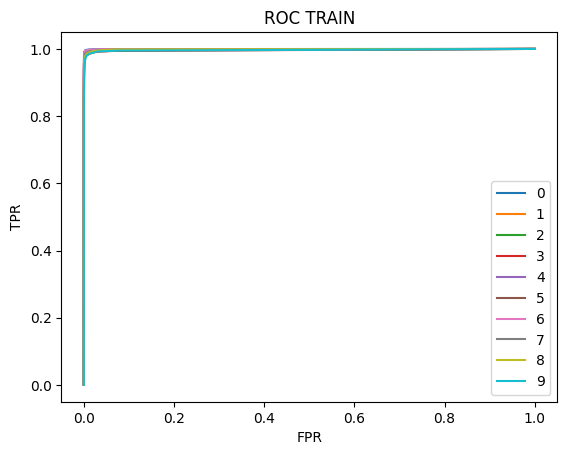

In [5]:
show_one_roc(rocs_train, 'TRAIN')

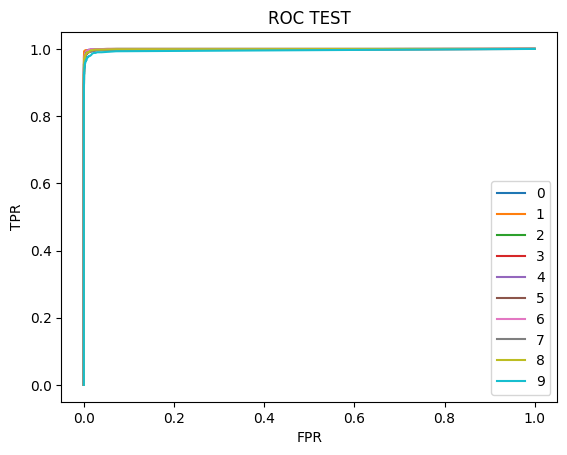

In [6]:
show_one_roc(rocs_test, 'TEST')